In [1]:
import iris
import iris.quickplot as qplt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# change to your suite-id to pick up the required file
runid='cq988'
datafile='/home/vagrant/cylc-run/u-'+runid+'/work/1/atmos/atmosa.pa19810901_00'

In [3]:
# constraint on time to get 2nd radiation timestep
tconstr=iris.Constraint(time=lambda cell: cell.point.hour == 2)

In [4]:
# load all AOD components at 0.55 micron
aod=iris.load(datafile,[
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i285') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i300') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i301') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i302') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i303') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i304') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i305') & tconstr])

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/pp.py:1562: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t1 = cftime.datetime(
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/pp.py:1597: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t2 = cftime.datetime(
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cf_units/__init__.py:402: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  dates = np.array([dt and dt.replace(microsecond=0) for dt in dates])
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [5]:
# load all AAOD components at 0.55 micron
aaod=iris.load(datafile,[
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i585') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i240') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i241') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i242') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i243') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i244') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i245') & tconstr])

In [6]:
# make cube to store total AOD
aodsum=aod[0].copy()
aodsum.data=np.zeros(aodsum.data.shape)

# add-up components
aodsum.data=aod[0].data+aod[1].data+aod[2].data+aod[3].data+aod[4].data+aod[5].data+aod[6].data

In [7]:
# make cube to store total AAOD
aaodsum=aaod[0].copy()
aaodsum.data=np.zeros(aaodsum.data.shape)

# add-up components
aaodsum.data=aaod[0].data+aaod[1].data+aaod[2].data+aaod[3].data+aaod[4].data+aaod[5].data+aaod[6].data

In [8]:
# calculate single-scattering albedo
ssa=aodsum.copy()
ssa.data=np.zeros(ssa.data.shape)
ssa.data = 1.0 - (aaodsum.data/aodsum.data)

# rename
ssa.rename('single_scattering_albedo_in_air_due_to_ambient_aerosol_particles')

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


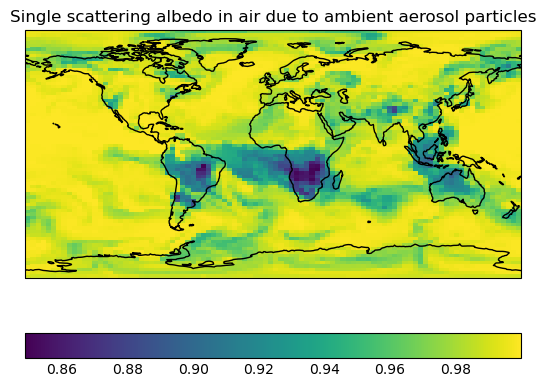

In [9]:
qplt.pcolormesh(ssa)
plt.gca().coastlines()

In [10]:
# output to netCDF
iris.save(ssa,'/home/vagrant/iris_Task123_SSA.nc',netcdf_format='NETCDF4')